# Specific Cluster Differential Expression

The initial round of differential expression was used to annotate clusters. Now that we have cluster annoations I zoom and look to see what are specific differences among clusters of similar cell types.

In [10]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs
from larval_gonad.config import memory

# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/scrnaseq_combine_force/')

alpha = 0.001

last updated: 2018-05-16 
Git hash: 2ab7e147bd4d8cf2b5529684ed180aa07ed7c54e


## Soma vs Germline

In [63]:
dat = pd.read_csv(
    Path(nbconfig.seurat_dir, 
         '2018-05-16_scrnaseq_early_spermatocytes_vs_spermatocytes_biomarkers.tsv'),
         sep='\t', index_col=[0, 1])

In [97]:
def wtf(fname, name1, name2):
    dat = pd.read_csv(Path(nbconfig.seurat_dir, fname), sep='\t', index_col=[0, 1])
    target = dat.query(f'p_val_adj <= {alpha} & avg_logFC > 0')

    # Remove make short list
    target.reset_index(inplace=True)
    mask = ~target.gene_symbol.str.startswith('CG') & ~target.gene_symbol.str.startswith('CR') & ~target.gene_symbol.str.startswith('Rp')
    display(Markdown(f'### Upregulated {name1} vs {name2}.'))
    print(target.loc[:, 'gene_symbol'].sort_values().unique().tolist())

    ax = target.plot('pct.1', 'pct.2', kind='scatter')
    ax.set_xlabel(name1)
    ax.set_ylabel(name2)

### Upregulated Early 1º Spermatocytes vs Mid and Late 1º Spermatocytes.

['14-3-3epsilon', '14-3-3zeta', 'ADD1', 'AIMP1', 'AIMP2', 'ATPsynC', 'ATPsynCF6', 'ATPsynD', 'ATPsynO', 'ATPsynbeta', 'ATPsynbetaL', 'ATPsyndelta', 'ATPsynepsilonL', 'ATPsyngamma', 'Aac11', 'Alg-2', 'Aos1', 'Aps', 'Ars2', 'Art6', 'B52', 'B9d1', 'Best3', 'Best4', 'BigH1', 'CCT1', 'CCT2', 'CCT3', 'CCT4', 'CCT5', 'CCT7', 'CCT8', 'CG10075', 'CG10340', 'CG10581', 'CG10602', 'CG10638', 'CG10887', 'CG10993', 'CG11138', 'CG11267', 'CG11505', 'CG11586', 'CG1161', 'CG11699', 'CG11700', 'CG11999', 'CG12004', 'CG12129', 'CG12213', 'CG12477', 'CG12493', 'CG12674', 'CG12848', 'CG1307', 'CG13096', 'CG1316', 'CG13364', 'CG13630', 'CG13807', 'CG13829', 'CG13887', 'CG14020', 'CG14456', 'CG14543', 'CG14561', 'CG14708', 'CG14810', 'CG14811', 'CG14932', 'CG15014', 'CG15040', 'CG15056', 'CG15142', 'CG15168', 'CG15227', 'CG15332', 'CG15881', 'CG1598', 'CG1646', 'CG17385', 'CG17454', 'CG17721', 'CG17734', 'CG18190', 'CG18508', 'CG18518', 'CG18815', 'CG18823', 'CG2182', 'CG2247', 'CG2604', 'CG2852', 'CG2862', 

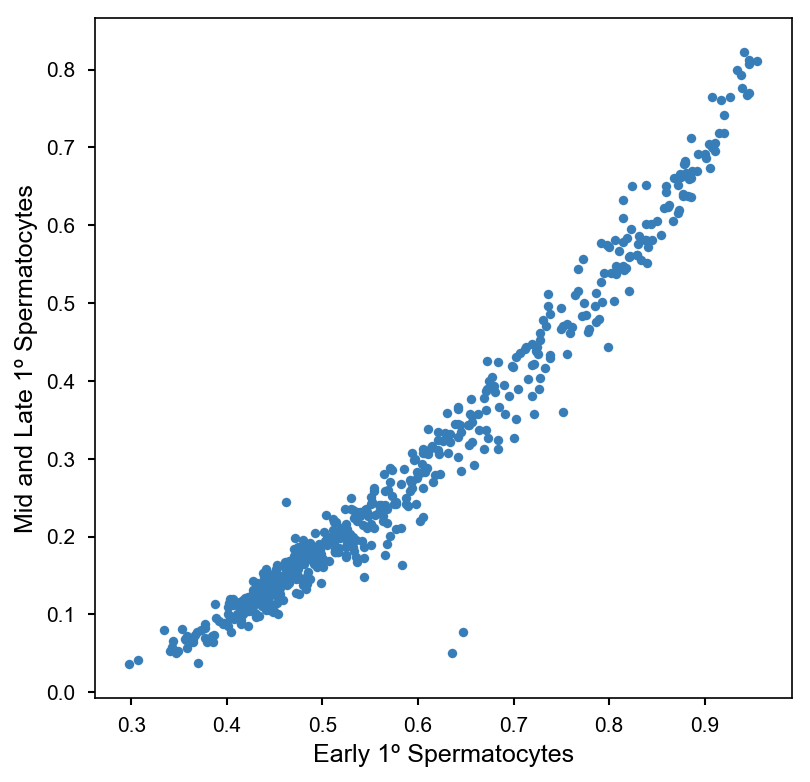

In [98]:
wtf('2018-05-16_scrnaseq_early_spermatocytes_vs_spermatocytes_biomarkers.tsv', 
    'Early 1º Spermatocytes',
    'Mid and Late 1º Spermatocytes',
   )

### Upregulated Mid 1º Spermatocytes vs Early and Late 1º Spermatocytes.

['Atg8b', 'CG10064', 'CG10317', 'CG11298', 'CG12020', 'CG12035', 'CG12307', 'CG12309', 'CG12860', 'CG12861', 'CG13110', 'CG13255', 'CG13337', 'CG13473', 'CG13544', 'CG13898', 'CG14071', 'CG14106', 'CG14391', 'CG14658', 'CG14684', 'CG14995', 'CG15403', 'CG15638', 'CG15676', 'CG16719', 'CG16824', 'CG16984', 'CG17470', 'CG18418', 'CG2127', 'CG2267', 'CG30161', 'CG30222', 'CG30278', 'CG30356', 'CG30393', 'CG31294', 'CG31407', 'CG31644', 'CG31806', 'CG31910', 'CG31948', 'CG32117', 'CG3215', 'CG32192', 'CG3222', 'CG34012', 'CG34210', 'CG34432', 'CG3982', 'CG4073', 'CG42355', 'CG43068', 'CG43183', 'CG43321', 'CG43755', 'CG43935', 'CG44296', 'CG4681', 'CG4691', 'CG5139', 'CG5217', 'CG5538', 'CG5614', 'CG5755', 'CG5968', 'CG6661', 'CG6980', 'CG8701', 'CG8813', 'CG8838', 'CG9016', 'CG9279', 'CG9589', 'CG9920', 'COX6AL', 'CR32835', 'CR43909', 'CR44455', 'CR44852', 'CR9284', 'Dpy-30L2', 'Hsp60B', 'Jupiter', 'Mst98Ca', 'ND-B14.5AL', 'Pif2', 'Pof', 'Prosbeta4R2', 'Rab3-GAP', 'S-Lap1', 'Tim17a2', 'Uc

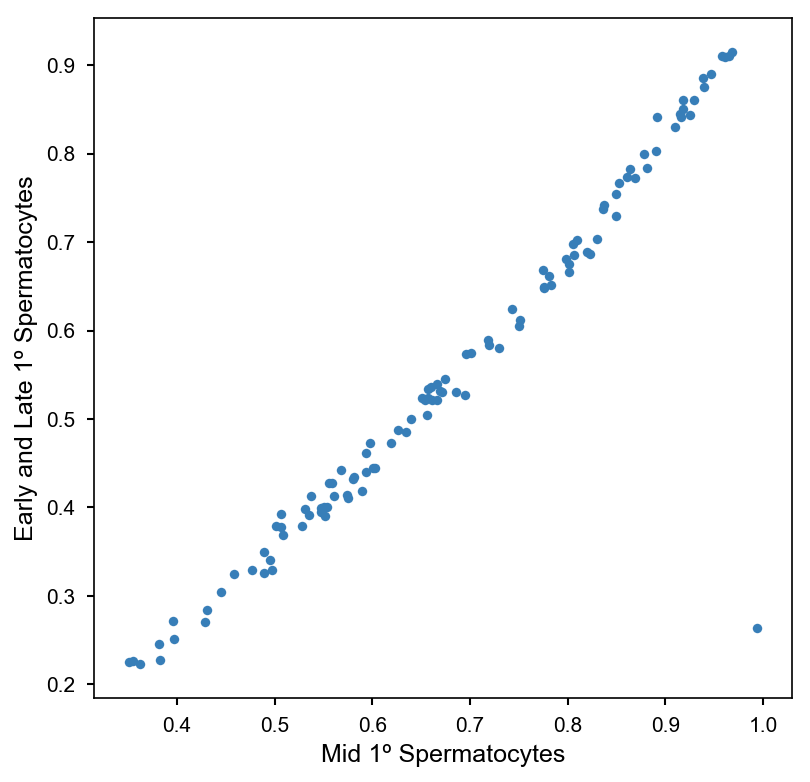

In [99]:
wtf('2018-05-16_scrnaseq_mid_spermatocytes_vs_spermatocytes_biomarkers.tsv', 
    'Mid 1º Spermatocytes',
    'Early and Late 1º Spermatocytes',
   )

### Upregulated Late 1º Spermatocytes vs Early and Mid 1º Spermatocytes.

['CG31226', 'CG45765', 'MRE16', 'Mst77F', 'Mst84Db', 'Mst84Dd', 'Npc2a', 'janB', 'mt:ATPase6', 'mt:CoI', 'mt:CoII', 'mt:CoIII', 'mt:Cyt-b', 'mt:ND4', 'mt:lrRNA', 'vir-1']


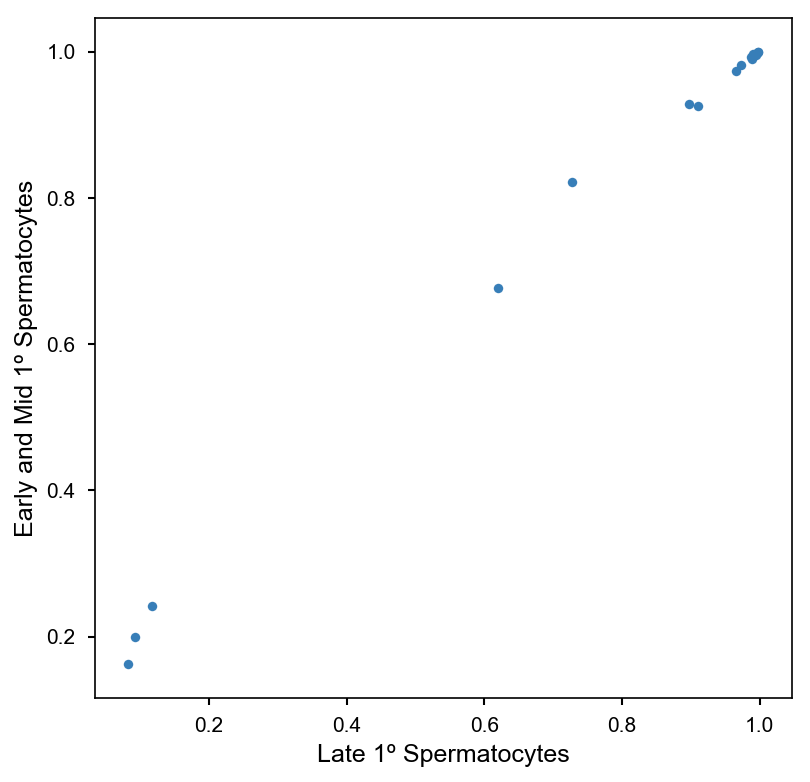

In [100]:
wtf('2018-05-16_scrnaseq_late_spermatocytes_vs_spermatocytes_biomarkers.tsv', 
    'Late 1º Spermatocytes',
    'Early and Mid 1º Spermatocytes',
   )

### Upregulated Eleven vs Early, Mid, and Late 1º Spermatocytes.

['ATPsynGL', 'Adgf-B', 'Adk1', 'Alr', 'Atg8b', 'CG10014', 'CG10064', 'CG10089', 'CG10171', 'CG10177', 'CG10307', 'CG10459', 'CG10589', 'CG10734', 'CG10750', 'CG10822', 'CG10834', 'CG10841', 'CG10862', 'CG10899', 'CG11125', 'CG11226', 'CG11286', 'CG11333', 'CG11362', 'CG11404', 'CG11588', 'CG11634', 'CG11694', 'CG12020', 'CG12035', 'CG12279', 'CG12309', 'CG12395', 'CG12516', 'CG12521', 'CG12684', 'CG12693', 'CG12831', 'CG12860', 'CG12861', 'CG13039', 'CG13110', 'CG13168', 'CG13220', 'CG1324', 'CG13244', 'CG13471', 'CG13476', 'CG13544', 'CG13747', 'CG13870', 'CG13898', 'CG14043', 'CG14053', 'CG14071', 'CG14113', 'CG14151', 'CG14269', 'CG14294', 'CG14316', 'CG14380', 'CG14391', 'CG14448', 'CG14480', 'CG14579', 'CG14605', 'CG14644', 'CG14658', 'CG14676', 'CG14684', 'CG14763', 'CG14835', 'CG14840', 'CG14891', 'CG14931', 'CG14974', 'CG15025', 'CG15124', 'CG15172', 'CG15200', 'CG15208', 'CG15233', 'CG15260', 'CG15278', 'CG15296', 'CG15306', 'CG15357', 'CG15418', 'CG15429', 'CG15498', 'CG15543

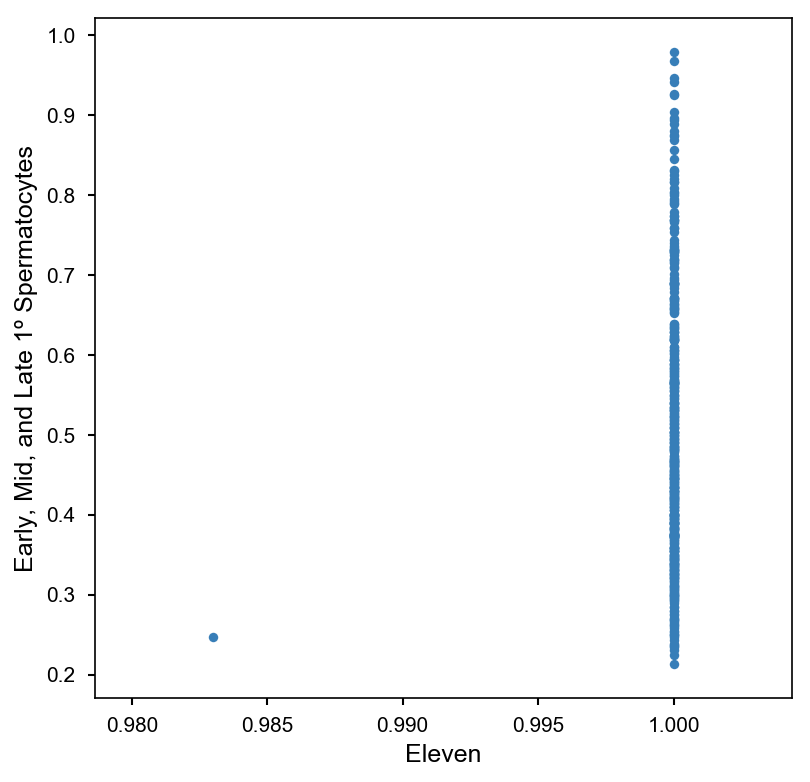

In [101]:
wtf('2018-05-16_scrnaseq_eleven_vs_spermatocytes_biomarkers.tsv', 
    'Eleven',
    'Early, Mid, and Late 1º Spermatocytes',
   )